In [1]:
from fastai.vision .all import *
import fastai
path = untar_data(URLs.PETS)
# For Fastai and PyTorch to explicitly use CPU


In [2]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale=0.75))
#pets.summary(path/"images", bs=12, device='cpu')
dls = pets.dataloaders(path/"images")

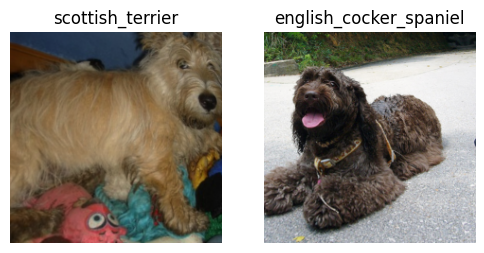

In [3]:
dls.show_batch(nrows=1, ncols=2)

In [6]:

learn  = vision_learner(dls, resnet34, metrics=error_rate)
print(next(learn.model.parameters()).device)  # Check model device
print(learn.dls.device)  # Check data loader device

#learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 78.5MB/s]


cpu
cuda:0


In [7]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.480274,0.331152,0.102842,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.491338,0.317508,0.100812,01:14
1,0.323866,0.213224,0.069689,01:13


In [11]:
x,y = dls.one_batch()
y

TensorCategory([21,  3, 13,  6, 18, 24, 29, 23, 34, 32, 14,  2, 28, 29, 17, 33,
                 0, 11, 22, 20, 10,  6, 29, 13, 31,  3, 16, 14, 31, 31, 22,  7,
                21, 36, 16, 13, 23, 25, 19, 26, 34, 24, 34, 24, 29, 30, 24,  4,
                19,  1, 29, 14, 16, 11,  7,  3, 31,  0, 25,  9,  7,  7, 22, 15],
               device='cuda:0')

In [13]:
preds,_= learn.get_preds(dl=[(x,y)])
preds[0]

tensor([4.9402e-11, 3.4848e-10, 4.3170e-09, 4.7996e-11, 7.1578e-11, 1.7018e-10,
        5.2773e-10, 1.5567e-08, 4.3318e-11, 1.1583e-11, 2.3255e-10, 1.0554e-10,
        6.3572e-10, 2.5070e-10, 2.3310e-09, 4.7746e-10, 2.3777e-09, 1.8573e-10,
        2.5807e-08, 5.2905e-06, 6.5818e-10, 9.9999e-01, 7.1020e-10, 1.0164e-08,
        2.4434e-09, 1.4146e-06, 5.1252e-11, 3.0966e-07, 5.4674e-10, 1.0389e-10,
        2.8074e-07, 4.3235e-08, 1.2118e-09, 2.9050e-10, 1.0194e-10, 1.4320e-08,
        4.8596e-12])

In [16]:
torch.argmax(preds[0])

tensor(21)